In [1]:
import pandas as pd
import csv
import shutil


In [67]:
data=pd.read_csv("/Users/joonghochoi/Desktop/nonIID_w_fedavg.csv")
# data=pd.read_csv("/Users/joonghochoi/Desktop/nonIID_w_dpsgd.csv")

In [68]:
print(data.shape)
length=len(data)
print(length)

(2760, 10)
2760


In [69]:
data.head(2)

,num,rate,round,ground truth,historical_cluster,current_cluster,train_loss,train_acc,test_loss,test_acc
0,10,0.125,1,[9],[9],[9],1.8493,0.3590,0.9647,0.8443
1,10,0.125,2,[9],[9],[9],0.8827,0.7229,0.3329,0.9176


In [70]:
data.tail(2)

,num,rate,round,ground truth,historical_cluster,current_cluster,train_loss,train_acc,test_loss,test_acc
2758,20,0.35,59,"[11, 2, 14, 12, 5, 8, 4]",[ 2 4 5 8 11 12 14],[ 2 4 5 8 11 12 14],0.1720,0.9486,0.0897,0.9748
2759,20,0.35,60,"[11, 2, 14, 12, 5, 8, 4]",[ 2 4 5 8 11 12 14],[ 2 4 5 8 11 12 14],0.1701,0.9501,0.0866,0.9753


In [71]:
print(data.iloc[0][3])
print(type(data.iloc[0][3]))
print(type(data.iloc[0][4]))

[9]
<class 'str'>
<class 'str'>


In [72]:
data.iloc[0][5]

'[9]'

In [73]:
import ast

string_list = '[0, 3, 4, 6]'
list_from_string = ast.literal_eval(string_list)

# Convert the list to a set
set_from_list = set(list_from_string)

print(set_from_list)


{0, 3, 4, 6}


In [74]:
import pandas as pd
import ast #Abstract Syntax Trees

data = pd.read_csv("/Users/joonghochoi/Desktop/nonIID_w_dpsgd.csv")

def convert_to_set(string_list):
    try:
        list_from_string = ast.literal_eval(string_list)
        return set(list_from_string)
    except (ValueError, SyntaxError):
        return set()

data['ground truth'] = data['ground truth'].apply(convert_to_set)


In [75]:
data.iloc[0][3]

{6}

In [76]:
def convert_space_separated_to_set(string_list):
    try:
        values = string_list.strip('[]').split()
        return set(int(value) for value in values)
    except ValueError:
        return set()

data['historical_cluster'] = data['historical_cluster'].apply(convert_space_separated_to_set)
data['current_cluster'] = data['current_cluster'].apply(convert_space_separated_to_set)

print(data.head())  


   num   rate  round ground truth historical_cluster current_cluster  \
0   10  0.125      1          {6}       {0, 3, 4, 6}    {0, 3, 4, 6}   
1   10  0.125      2          {6}          {3, 4, 6}       {9, 6, 7}   
2   10  0.125      3          {6}          {3, 4, 6}    {0, 1, 3, 6}   
3   10  0.125      4          {6}          {3, 4, 6}    {2, 3, 4, 6}   
4   10  0.125      5          {6}                {6}    {9, 4, 6, 7}   

   train_loss  train_acc  test_loss  test_acc  
0      2.1824     0.2103     1.9274    0.5728  
1      1.6226     0.4634     0.9604    0.7902  
2      1.1492     0.6193     0.6088    0.8576  
3      0.9303     0.6984     0.4688    0.8841  
4      0.8014     0.7421     0.3900    0.9005  


In [77]:
print(data.tail())

      num   rate  round            ground truth  \
2935   50  0.125     56  {33, 2, 8, 41, 13, 27}   
2936   50  0.125     57  {33, 2, 8, 41, 13, 27}   
2937   50  0.125     58  {33, 2, 8, 41, 13, 27}   
2938   50  0.125     59  {33, 2, 8, 41, 13, 27}   
2939   50  0.125     60  {33, 2, 8, 41, 13, 27}   

                                     historical_cluster  \
2935  {1, 4, 5, 6, 8, 10, 13, 15, 18, 20, 23, 24, 30...   
2936  {1, 4, 5, 6, 8, 10, 13, 15, 18, 20, 23, 24, 30...   
2937  {1, 4, 5, 6, 8, 10, 13, 15, 18, 20, 23, 24, 30...   
2938  {1, 4, 5, 6, 8, 10, 13, 15, 18, 20, 23, 24, 30...   
2939  {1, 4, 5, 6, 8, 10, 13, 15, 18, 20, 23, 24, 30...   

                                        current_cluster  train_loss  \
2935  {1, 2, 4, 5, 6, 8, 10, 13, 15, 18, 20, 21, 23,...      1.3051   
2936  {1, 2, 4, 5, 6, 7, 8, 10, 13, 15, 18, 20, 21, ...      1.2889   
2937  {1, 4, 5, 6, 7, 8, 10, 13, 15, 18, 20, 23, 24,...      1.2714   
2938  {1, 4, 5, 6, 8, 10, 13, 18, 20, 21, 23, 24, 29..

In [89]:
def calculate_precision(cluster_set, ground_truth_set):
    if not cluster_set:
        return None  
    elif not ground_truth_set:
        return 0  
    else:
        true_positives = len(cluster_set.intersection(ground_truth_set))
        false_positives = len(cluster_set.difference(ground_truth_set))
        return true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
def calculate_accuracy(cluster_set, ground_truth_set):
    if not cluster_set or not ground_truth_set:  
        return None  
    else:
        return len(cluster_set.intersection(ground_truth_set)) / len(ground_truth_set)

In [79]:
data['precision_historical_cluster'] = data.apply(lambda row: calculate_precision(row['historical_cluster'], row['ground truth']), axis=1)
data['precision_current_cluster'] = data.apply(lambda row: calculate_precision(row['current_cluster'], row['ground truth']), axis=1)

In [90]:
data['accuracy_historical_cluster'] = data.apply(lambda row: calculate_accuracy(row['historical_cluster'], row['ground truth']), axis=1)
data['accuracy_current_cluster'] = data.apply(lambda row: calculate_accuracy(row['current_cluster'], row['ground truth']), axis=1)

In [91]:
data.head(2)

,num,rate,round,ground truth,historical_cluster,current_cluster,train_loss,train_acc,test_loss,test_acc,precision_historical_cluster,precision_current_cluster,skewness_factor,accuracy_historical_cluster,accuracy_current_cluster
0,10,0.125,1,{6},"{0, 3, 4, 6}","{0, 3, 4, 6}",2.1824,0.2103,1.9274,0.5728,0.250000,0.250000,0.3,1.0,1.0
1,10,0.125,2,{6},"{3, 4, 6}","{9, 6, 7}",1.6226,0.4634,0.9604,0.7902,0.333333,0.333333,0.3,1.0,1.0


In [92]:
data.tail(2)

,num,rate,round,ground truth,historical_cluster,current_cluster,train_loss,train_acc,test_loss,test_acc,precision_historical_cluster,precision_current_cluster,skewness_factor,accuracy_historical_cluster,accuracy_current_cluster
2938,50,0.125,59,"{33, 2, 8, 41, 13, 27}","{1, 4, 5, 6, 8, 10, 13, 15, 18, 20, 23, 24, 30...","{1, 4, 5, 6, 8, 10, 13, 18, 20, 21, 23, 24, 29...",1.2634,0.5948,1.0234,0.8019,0.181818,0.181818,0.7,0.666667,0.666667
2939,50,0.125,60,"{33, 2, 8, 41, 13, 27}","{1, 4, 5, 6, 8, 10, 13, 15, 18, 20, 23, 24, 30...","{1, 2, 4, 5, 6, 8, 10, 13, 15, 18, 20, 21, 23,...",1.2472,0.5986,1.0031,0.8067,0.181818,0.272727,0.7,0.666667,1.000000


In [82]:
data.to_csv("/Users/joonghochoi/Desktop/updated_fedavg_result_data.csv", index=False)

In [83]:
data['skewness_factor']=1

In [84]:
data.head(2)

,num,rate,round,ground truth,historical_cluster,current_cluster,train_loss,train_acc,test_loss,test_acc,precision_historical_cluster,precision_current_cluster,skewness_factor
0,10,0.125,1,{6},"{0, 3, 4, 6}","{0, 3, 4, 6}",2.1824,0.2103,1.9274,0.5728,0.250000,0.250000,1
1,10,0.125,2,{6},"{3, 4, 6}","{9, 6, 7}",1.6226,0.4634,0.9604,0.7902,0.333333,0.333333,1


In [85]:
data['skewness_factor'] = 1
skewness_factors = [0.3, 0.5, 0.7]
idx = 0
prev = 0

for i in range(len(data)):
    data.loc[i, 'skewness_factor'] = skewness_factors[idx]
    val = data.loc[i, 'num']
    
    if val != prev:
        print("val",val)
        print("prev",prev)
        a=prev
        b=val
        prev = val 
        if a == 50 and b == 10:
            idx += 1 
            print("idx")

val 10
prev 0
val 20
prev 10
val 50
prev 20
val 10
prev 50
idx
val 20
prev 10
val 50
prev 20
val 10
prev 50
idx
val 20
prev 10
val 50
prev 20


In [86]:
data.head(2)

,num,rate,round,ground truth,historical_cluster,current_cluster,train_loss,train_acc,test_loss,test_acc,precision_historical_cluster,precision_current_cluster,skewness_factor
0,10,0.125,1,{6},"{0, 3, 4, 6}","{0, 3, 4, 6}",2.1824,0.2103,1.9274,0.5728,0.250000,0.250000,0.3
1,10,0.125,2,{6},"{3, 4, 6}","{9, 6, 7}",1.6226,0.4634,0.9604,0.7902,0.333333,0.333333,0.3


In [87]:
data.tail(2)

,num,rate,round,ground truth,historical_cluster,current_cluster,train_loss,train_acc,test_loss,test_acc,precision_historical_cluster,precision_current_cluster,skewness_factor
2938,50,0.125,59,"{33, 2, 8, 41, 13, 27}","{1, 4, 5, 6, 8, 10, 13, 15, 18, 20, 23, 24, 30...","{1, 4, 5, 6, 8, 10, 13, 18, 20, 21, 23, 24, 29...",1.2634,0.5948,1.0234,0.8019,0.181818,0.181818,0.7
2939,50,0.125,60,"{33, 2, 8, 41, 13, 27}","{1, 4, 5, 6, 8, 10, 13, 15, 18, 20, 23, 24, 30...","{1, 2, 4, 5, 6, 8, 10, 13, 15, 18, 20, 21, 23,...",1.2472,0.5986,1.0031,0.8067,0.181818,0.272727,0.7


In [105]:
import pandas as pd

grouped_data = data.groupby(['rate', 'skewness_factor', 'num']).agg({
    'accuracy_historical_cluster': 'mean',  
    'accuracy_current_cluster': 'mean',  
})

print(grouped_data)


                           accuracy_historical_cluster  \
rate  skewness_factor num                                
0.125 0.3             10                      0.983607   
                      20                      1.000000   
                      50                      0.977778   
      0.5             10                      0.983333   
                      20                      0.875000   
                      50                      0.416667   
      0.7             10                      0.762712   
                      20                      0.633333   
                      50                      0.669444   
0.200 0.3             10                      1.000000   
                      20                      1.000000   
                      50                      0.981667   
      0.5             10                      0.975000   
                      20                      1.000000   
                      50                      0.178333   
      0.7     

In [100]:
type(grouped_data.iloc[0])

pandas.core.series.Series

In [102]:
grouped_data.iloc[0].historical_cluster

{0.0,
 0.01639344262295082,
 0.04918032786885246,
 0.06557377049180328,
 0.09836065573770492}

In [106]:
grouped_data.to_csv('grouped_data.csv')

In [120]:
"""
Does the historical gradients method outperform the current gradients method under heterogeneity 
with different levels of skewness?
"""
df=grouped_data
grouped = grouped_data.groupby(['rate', 'skewness_factor']).mean()

 comparison = grouped['accuracy_historical_cluster'] > grouped['accuracy_current_cluster']
print(comparison)
comparison.to_csv("/Users/joonghochoi/Desktop/hypothesis1.csv", index=True)

rate   skewness_factor
0.125  0.3                 True
       0.5                False
       0.7                False
0.200  0.3                 True
       0.5                False
       0.7                False
0.275  0.3                 True
       0.5                False
       0.7                False
0.350  0.3                 True
       0.5                False
       0.7                False
0.425  0.3                 True
       0.5                False
       0.7                False
0.475  0.3                 True
       0.5                False
       0.7                False
dtype: bool


In [121]:
"""
Does the historical gradients method outperform the current gradients method with varying 
numbers of participating clients?
"""
grouped_num = df.groupby(['rate', 'num']).mean()

comparison_num = grouped_num['accuracy_historical_cluster'] > grouped_num['accuracy_current_cluster']
print(comparison_num)
comparison.to_csv("/Users/joonghochoi/Desktop/hypothesis2.csv", index=True)

rate   num
0.125  10     False
       20     False
       50      True
0.200  10     False
       20     False
       50     False
0.275  10     False
       20     False
       50     False
0.350  10     False
       20     False
       50     False
0.425  10     False
       20     False
       50     False
0.475  10     False
       20     False
       50      True
dtype: bool


In [122]:
"""
Does the historical gradients method outperform the current gradients
method with different percentages of malicious clients?
"""
grouped_rate = df.groupby('rate').mean()

comparison_rate = grouped_rate['accuracy_historical_cluster'] > grouped_rate['accuracy_current_cluster']
print(comparison_rate)
comparison.to_csv("/Users/joonghochoi/Desktop/hypothesis3.csv", index=True)

rate
0.125    False
0.200    False
0.275    False
0.350    False
0.425    False
0.475    False
dtype: bool


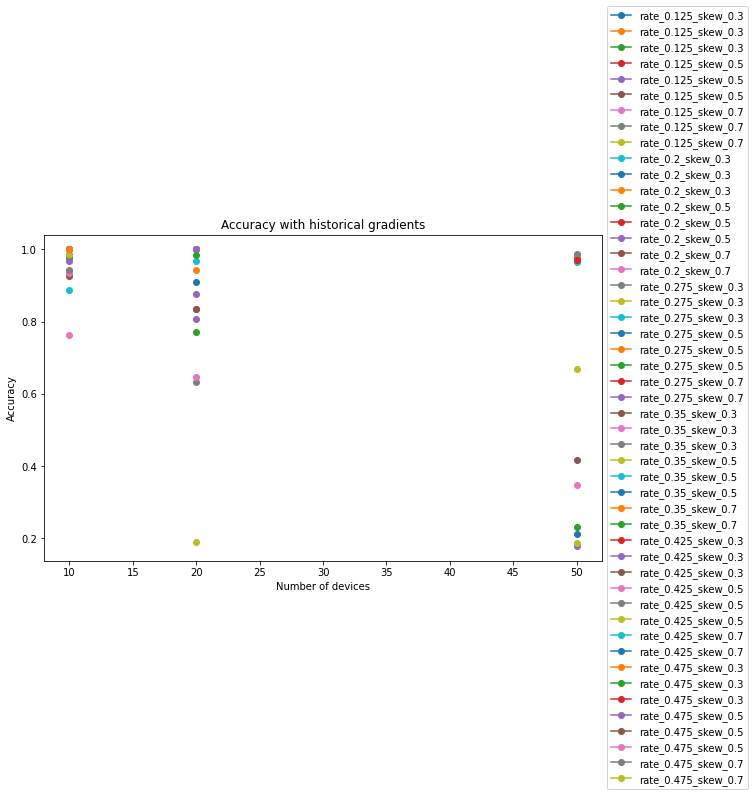

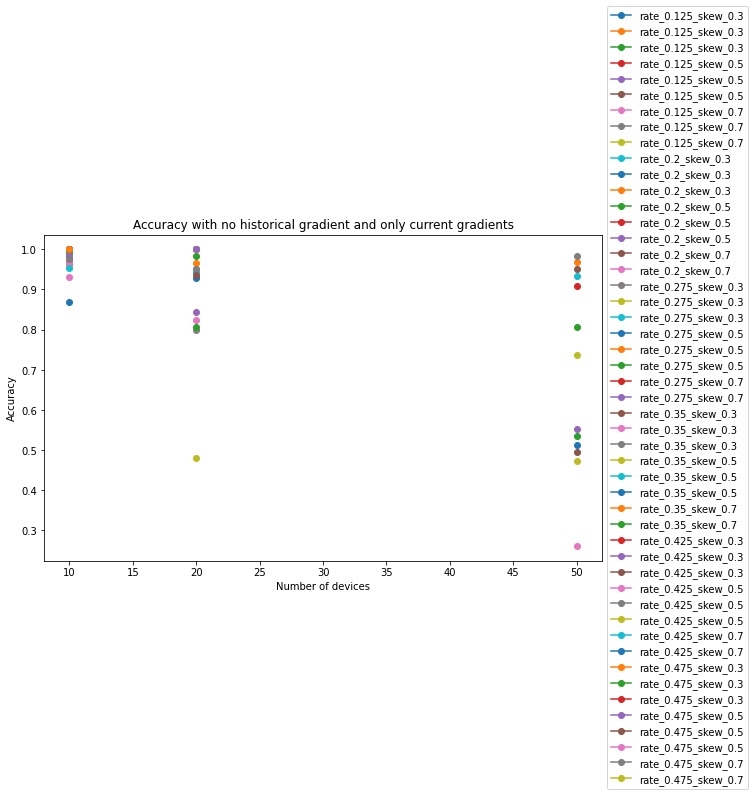

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for (rate, skewness, num), subset in grouped_data.groupby(level=[0, 1, 2]):
    plt.plot(subset.index.get_level_values('num'), subset['accuracy_historical_cluster'], marker='o', label=f"rate_{rate}_skew_{skewness}")

plt.xlabel('Number of devices')
plt.ylabel('Accuracy')
plt.title('Accuracy with historical gradients')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Plot for accuracy_current_cluster
plt.figure(figsize=(10, 6))
for (rate, skewness, num), subset in grouped_data.groupby(level=[0, 1, 2]):
    plt.plot(subset.index.get_level_values('num'), subset['accuracy_current_cluster'], marker='o', label=f"rate_{rate}_skew_{skewness}")

plt.xlabel('Number of devices')
plt.ylabel('Accuracy')
plt.title('Accuracy with no historical gradient and only current gradients')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


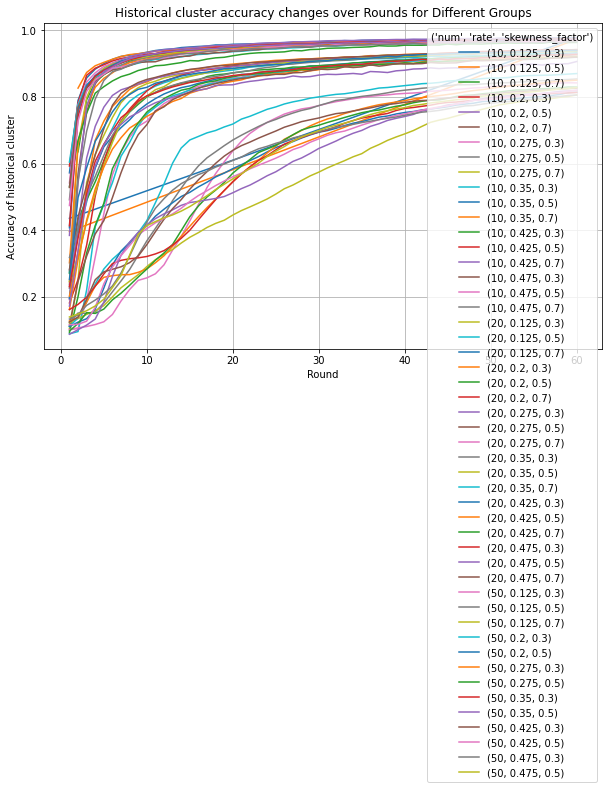

In [94]:
import matplotlib.pyplot as plt
import pandas as pd


grouped = data.groupby(['num', 'rate', 'skewness_factor'])

# Plotting test_acc over round with different colors for each group
plt.figure(figsize=(10, 6))

for name, group in grouped:
    plt.plot(group['round'], group['test_acc'], label=name)
#     plt.plot(group['round'], group['precision_historical_cluster'], label=name)

plt.xlabel('Round')
plt.ylabel('Accuracy of historical cluster')
plt.title('Historical cluster accuracy changes over Rounds for Different Groups')
plt.legend(title=('num', 'rate', 'skewness_factor'), loc='best')
plt.grid(True)
plt.show()


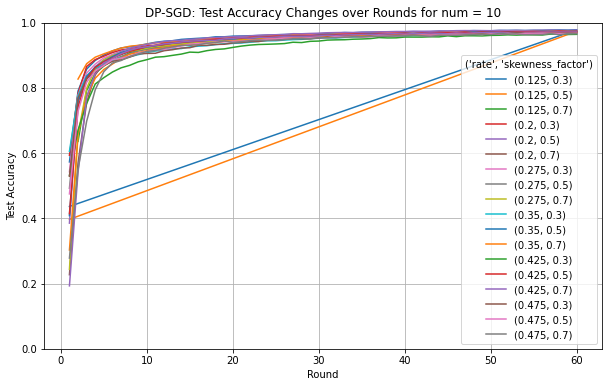

The combination with the highest accuracy at the final round for num = 10 is: (0.2, 0.5) with accuracy 0.9772


In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
data_num_10 = data[data['num'] == 10]

grouped10 = data_num_10.groupby(['rate', 'skewness_factor'])

plt.figure(figsize=(10, 6))
final_accuracies = {}
for name, group in grouped10:
    plt.plot(group['round'], group['test_acc'], label=name)
    final_accuracies[name] = group['test_acc'].iloc[-1]

plt.xlabel('Round')
plt.ylabel('Test Accuracy')
# plt.title('FedAvg: Test Accuracy Changes over Rounds for num = 10')
plt.title('DP-SGD: Test Accuracy Changes over Rounds for num = 10')

plt.legend(title=('rate', 'skewness_factor'), loc='best')
plt.grid(True)

# Adjusting the y-axis limits for more detail
plt.ylim(0, 1)  # Set your desired limits here

plt.show()
best_combination = max(final_accuracies, key=final_accuracies.get)
print(f"The combination with the highest accuracy at the final round for num = 10 is: {best_combination} with accuracy {final_accuracies[best_combination]}")

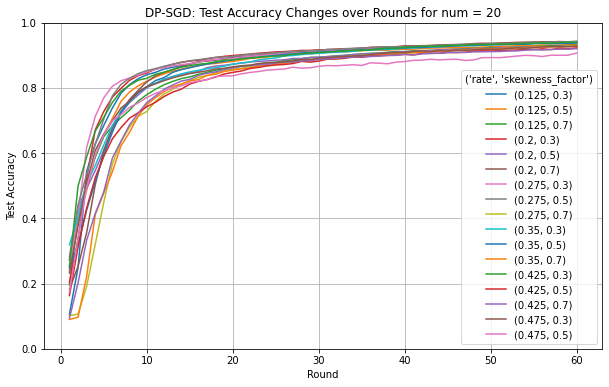

The combination with the highest accuracy at the final round for num = 20 is: (0.2, 0.7) with accuracy 0.9427


In [20]:
import matplotlib.pyplot as plt
import pandas as pd

data_num_20 = data[data['num'] == 20]

grouped20 = data_num_20.groupby(['rate', 'skewness_factor'])

final_accuracies = {}
plt.figure(figsize=(10, 6))

for name, group in grouped20:
    plt.plot(group['round'], group['test_acc'], label=name)
    final_accuracies[name] = group['test_acc'].iloc[-1]

plt.xlabel('Round')
plt.ylabel('Test Accuracy')
# plt.title('FedAvg: Test Accuracy Changes over Rounds for num = 20')
plt.title('DP-SGD: Test Accuracy Changes over Rounds for num = 20')

plt.legend(title=('rate', 'skewness_factor'), loc='best')
plt.grid(True)

plt.ylim(0, 1)  # Set your desired limits here

plt.show()
best_combination = max(final_accuracies, key=final_accuracies.get)
print(f"The combination with the highest accuracy at the final round for num = 20 is: {best_combination} with accuracy {final_accuracies[best_combination]}")

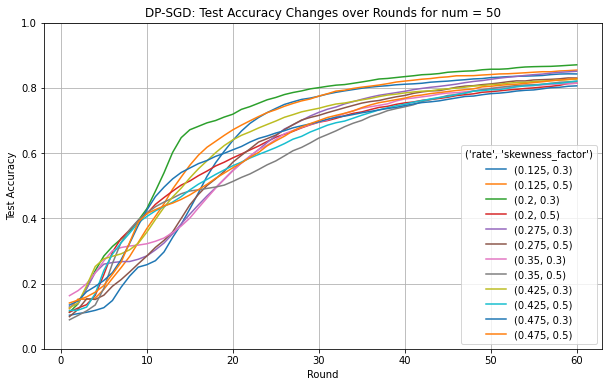

The combination with the highest accuracy at the final round for num = 50 is: (0.2, 0.7) with accuracy 0.9427


In [21]:
import matplotlib.pyplot as plt
import pandas as pd

data_num_50 = data[data['num'] == 50]

grouped50 = data_num_50.groupby(['rate', 'skewness_factor'])

plt.figure(figsize=(10, 6))

for name, group in grouped50:
    plt.plot(group['round'], group['test_acc'], label=name)
    final_accuracies[name] = group['test_acc'].iloc[-1]

plt.xlabel('Round')
plt.ylabel('Test Accuracy')
# plt.title('FedAvg: Test Accuracy Changes over Rounds for num = 50')
plt.title('DP-SGD: Test Accuracy Changes over Rounds for num = 50')

plt.legend(title=('rate', 'skewness_factor'), loc='best')
plt.grid(True)

plt.ylim(0, 1)  # Set your desired limits here

plt.show()
best_combination = max(final_accuracies, key=final_accuracies.get)
print(f"The combination with the highest accuracy at the final round for num = 50 is: {best_combination} with accuracy {final_accuracies[best_combination]}")

In [ ]:
data.head(2)

In [ ]:
final= data[data['round'] == 60]
final.shape

In [ ]:
final.loc[:, ['num', 'rate', 'skewness_factor','test_acc']]


In [ ]:
pivot_table = final.pivot_table(index='num', columns='skewness_factor', values='test_acc')
pivot_table

In [ ]:
pivot_table = final.pivot_table(index='num', columns=['skewness_factor', 'rate'], values='test_acc')
pivot_table

In [ ]:
# pivot_table.to_csv('fedavg_res.csv')
pivot_table.to_csv('dpsgd_res.csv')


In [ ]:
data=pd.read_csv("/Users/joonghochoi/Desktop/nonIID_w_dpsgd.csv")